In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
import os

os.getcwd()

'/Users/sunnycao/Desktop/Project/Python/Olympics'

In [25]:
athletes = pd.read_csv('/Users/sunnycao/Desktop/Project/Python/Olympics/athlete_events.csv')
region = pd.read_csv('/Users/sunnycao/Desktop/Project/Python/Olympics/noc_regions.csv')

In [26]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [27]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [28]:
# Join Dataframe

athletes_full = athletes.merge(region,how = 'left',on = 'NOC')

In [29]:
athletes_full.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [30]:
# Make column name consistant

athletes_full.rename(columns={'region':'Region','notes':'Notes'},inplace=True)
athletes_full.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [44]:
# Check for null values

athletes_full.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [32]:
athletes_full.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [52]:

for col in athletes_full.columns:
    missing = np.mean(athletes_full[col].isnull())
    print('{}: {}%'.format(col,missing))

ID: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 0.0349444518213606%
Height: 0.22193821095029434%
Weight: 0.23191180159046312%
Team: 0.0%
NOC: 0.0%
Games: 0.0%
Year: 0.0%
Season: 0.0%
City: 0.0%
Sport: 0.0%
Event: 0.0%
Medal: 0.853262072323286%
Region: 0.0013647294884846339%
Notes: 0.9814138597500701%


In [56]:
# China Olympics Details
athletes_full[athletes_full['Team'] == 'China'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [62]:
# Japan Details

athletes_full.query('Team == "Japan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [73]:
# Top countries participating

Countries = athletes_full.groupby('Team')
Countries['Games'].count().sort_values(ascending = False).head(10)

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Games, dtype: int64

In [72]:
Top10_Countries = athletes_full['Team'].value_counts().sort_values(ascending = False).head(10)
Top10_Countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

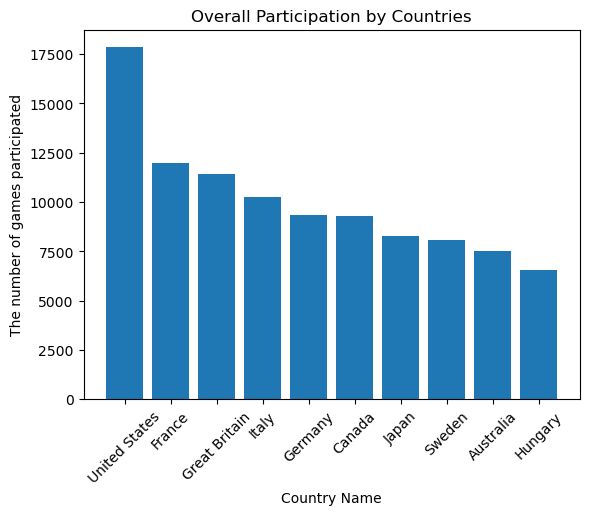

In [88]:
plt.bar(x = Top10_Countries.index,height = Top10_Countries.values)
plt.title('Overall Participation by Countries')
plt.xticks(rotation = 45);
plt.xlabel('Country Name')
plt.ylabel('The number of games participated');

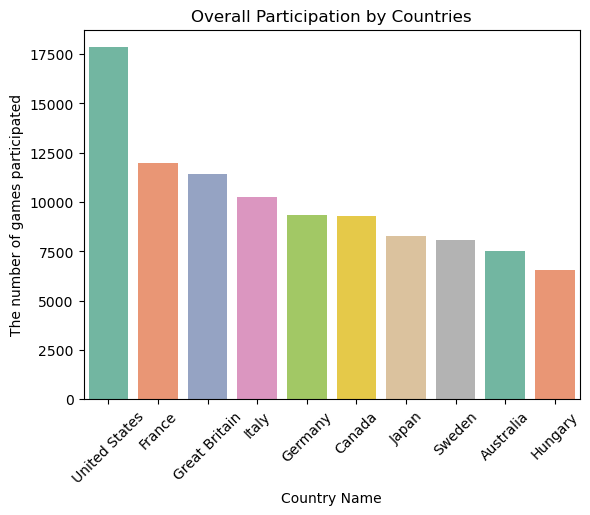

In [89]:
sns.barplot(x = Top10_Countries.index, y = Top10_Countries, palette = 'Set2')
plt.title('Overall Participation by Countries')
plt.xticks(rotation = 45);
plt.xlabel('Country Name')
plt.ylabel('The number of games participated');

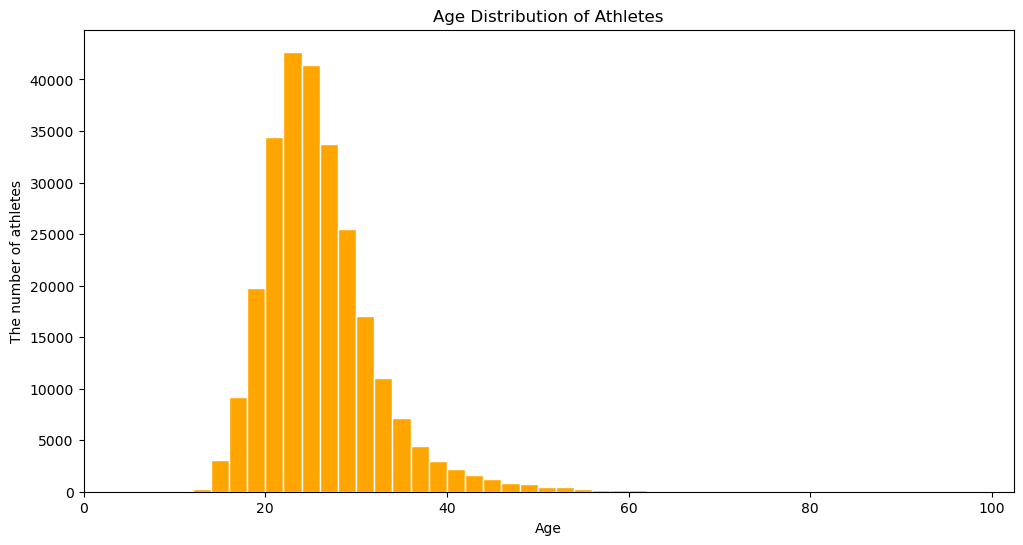

In [105]:
# Age Distribution of athletes

plt.figure(figsize=(12,6))
plt.title('Age Distribution of Athletes')
plt.hist(x=athletes_full['Age'],bins=np.arange(10,100,2),color='orange',edgecolor='white');
plt.xlabel('Age')
plt.ylabel('The number of athletes')
plt.xlim(0);

In [110]:
# Sports played in Summer and Winter Olympics 

Summer_sports = athletes_full[athletes_full['Season'] == 'Summer']['Sport'].unique()
Summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [111]:
Winter_sports = athletes_full[athletes_full['Season'] == 'Winter']['Sport'].unique()
Winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [115]:
# Males and Female Participants

gender_counts = athletes_full['Sex'].value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

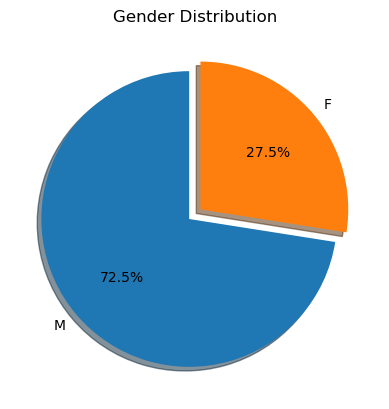

In [129]:
plt.pie(gender_counts,autopct='%1.1f%%',labels = gender_counts.index,startangle = 90,shadow=True,explode=(0.05,0.05))
plt.title('Gender Distribution')


In [133]:
# Total Medals

athletes_full['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [192]:
# Female participation in Summer & Winter Olympics separately

Summer = athletes_full[(athletes_full['Sex']=='F')&(athletes_full['Season']=='Summer')][['Sex','Year']]
Summer.groupby('Year').count().tail()

,Sex
Year,
2000,5431
2004,5546
2008,5816
2012,5815
2016,6223


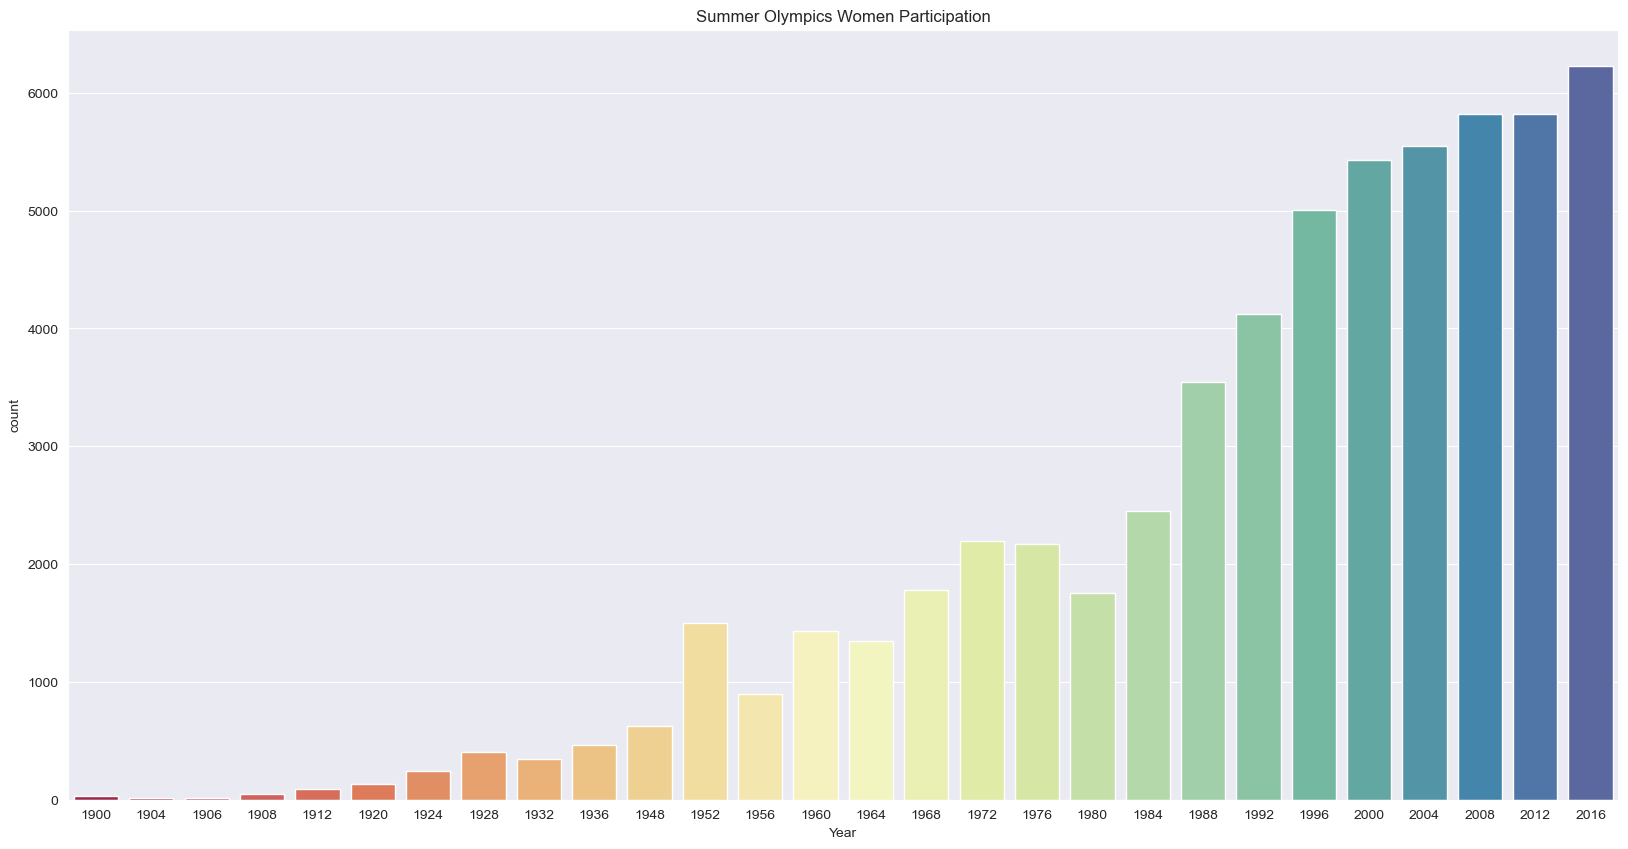

In [193]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=Summer,palette = 'Spectral')
plt.title('Summer Olympics Women Participation');

In [211]:
Winter = athletes_full[(athletes_full['Sex']=='F')&(athletes_full['Season']=='Winter')][['Sex','Year']]
Winter.groupby('Year').count().head()

,Sex
Year,
1924,17
1928,33
1932,22
1936,81
1948,133


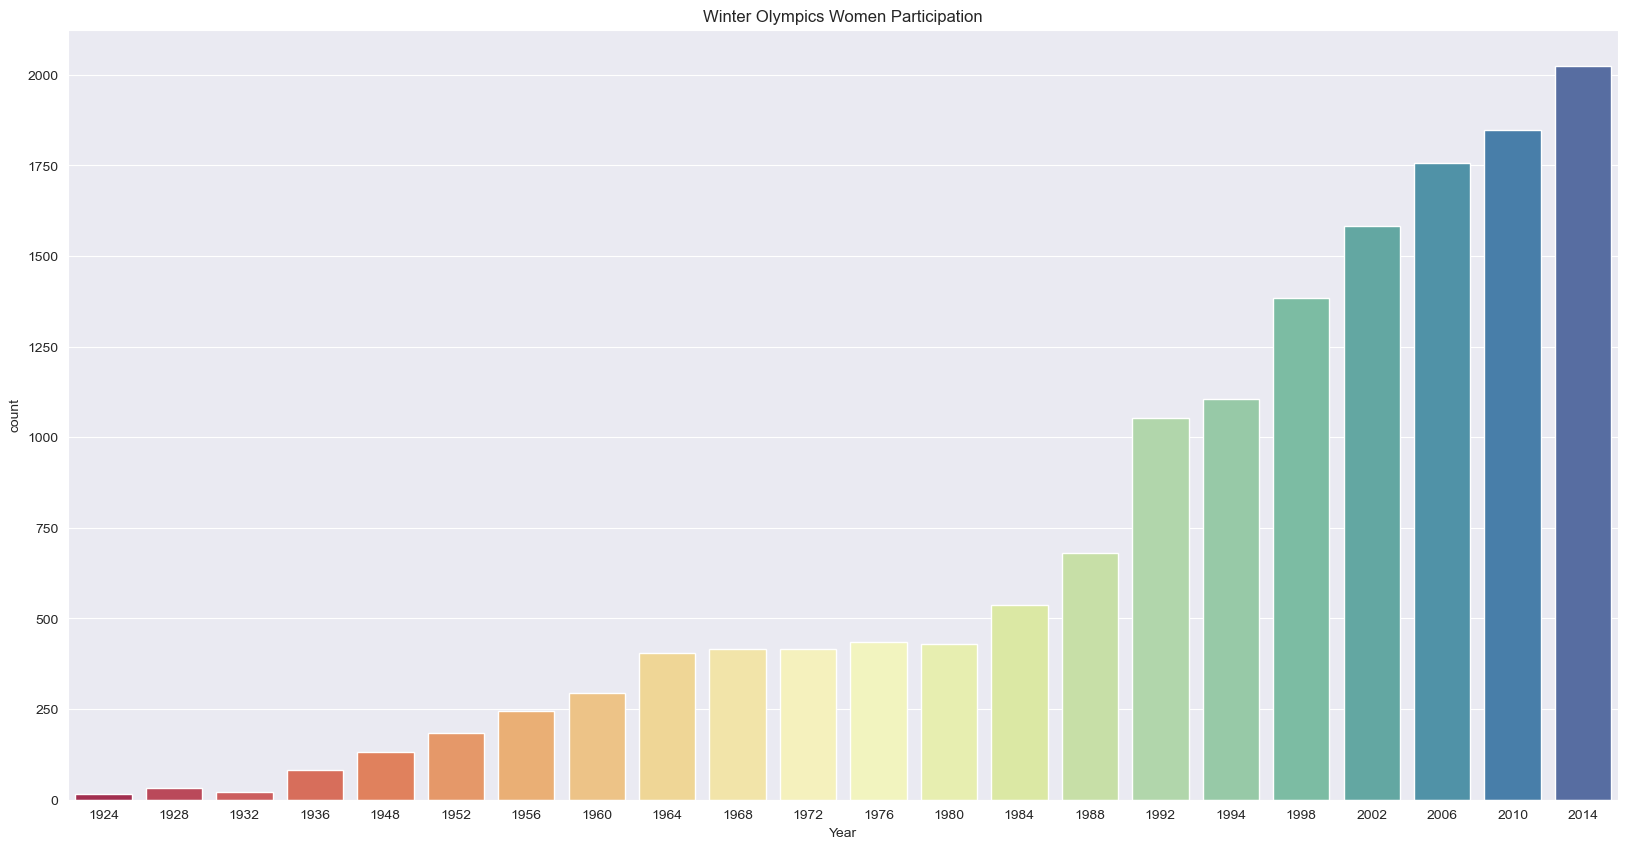

In [191]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=Winter,palette = 'Spectral')
plt.title('Winter Olympics Women Participation');

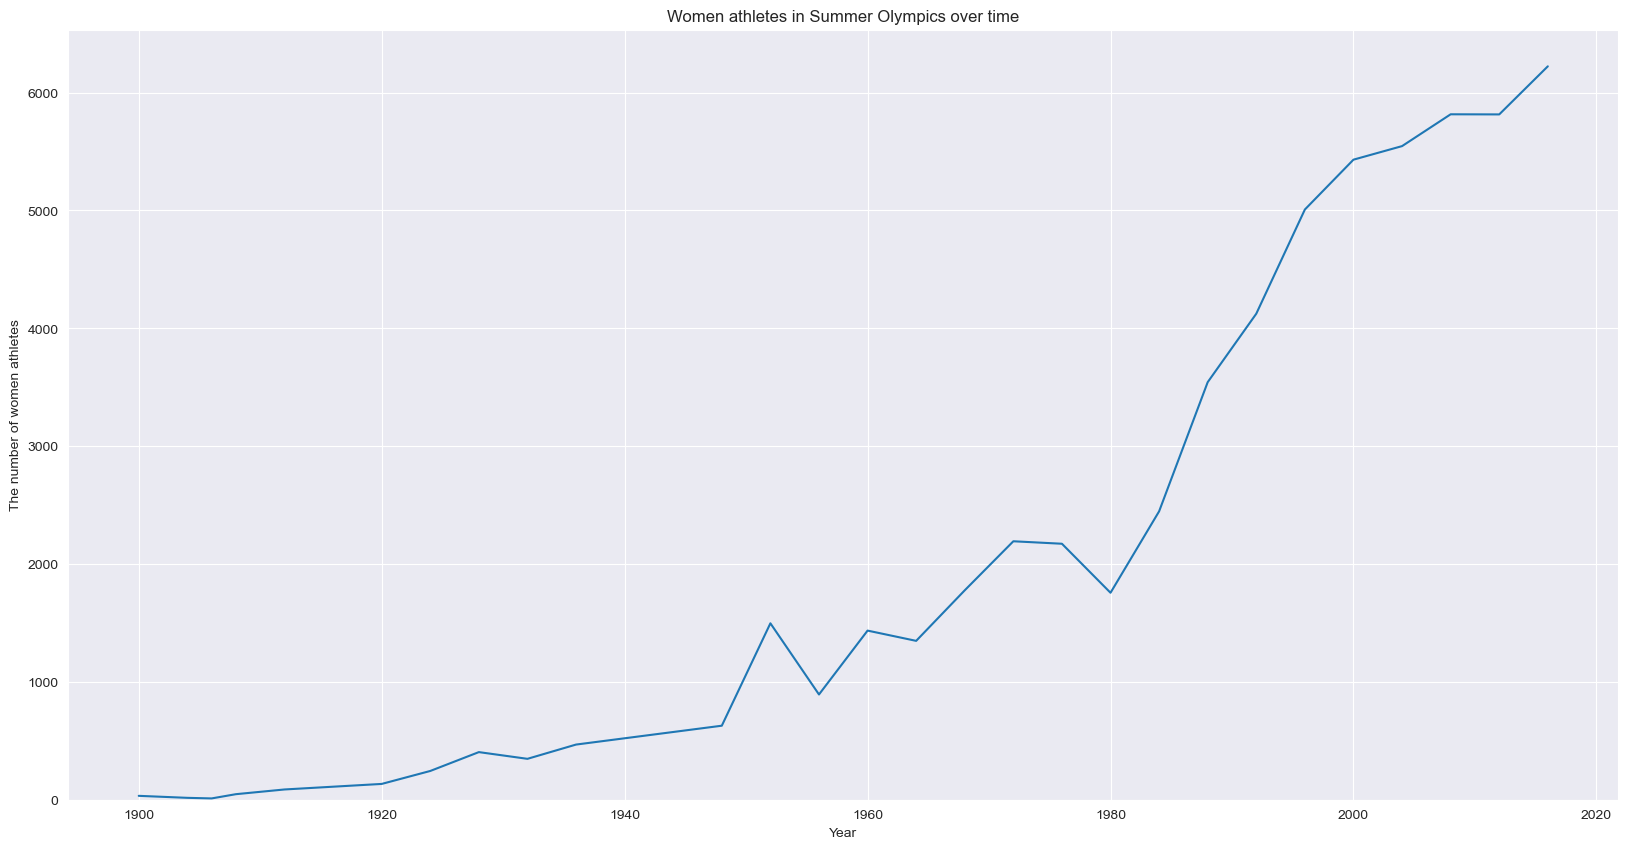

In [210]:
# Total number of female athletes in each Olympics

Female_summer = athletes_full[(athletes_full['Sex']=='F')&(athletes_full['Season']=='Summer')][['Sex','Year']]
Female_Summer_Participation = Female_summer.groupby('Year')['Sex'].count()


plt.figure(figsize=(20,10))
plt.plot(Female_Summer_Participation.index,Female_Summer_Participation)
plt.title('Women athletes in Summer Olympics over time')
plt.xlabel('Year')
plt.ylabel('The number of women athletes')
plt.ylim(0);

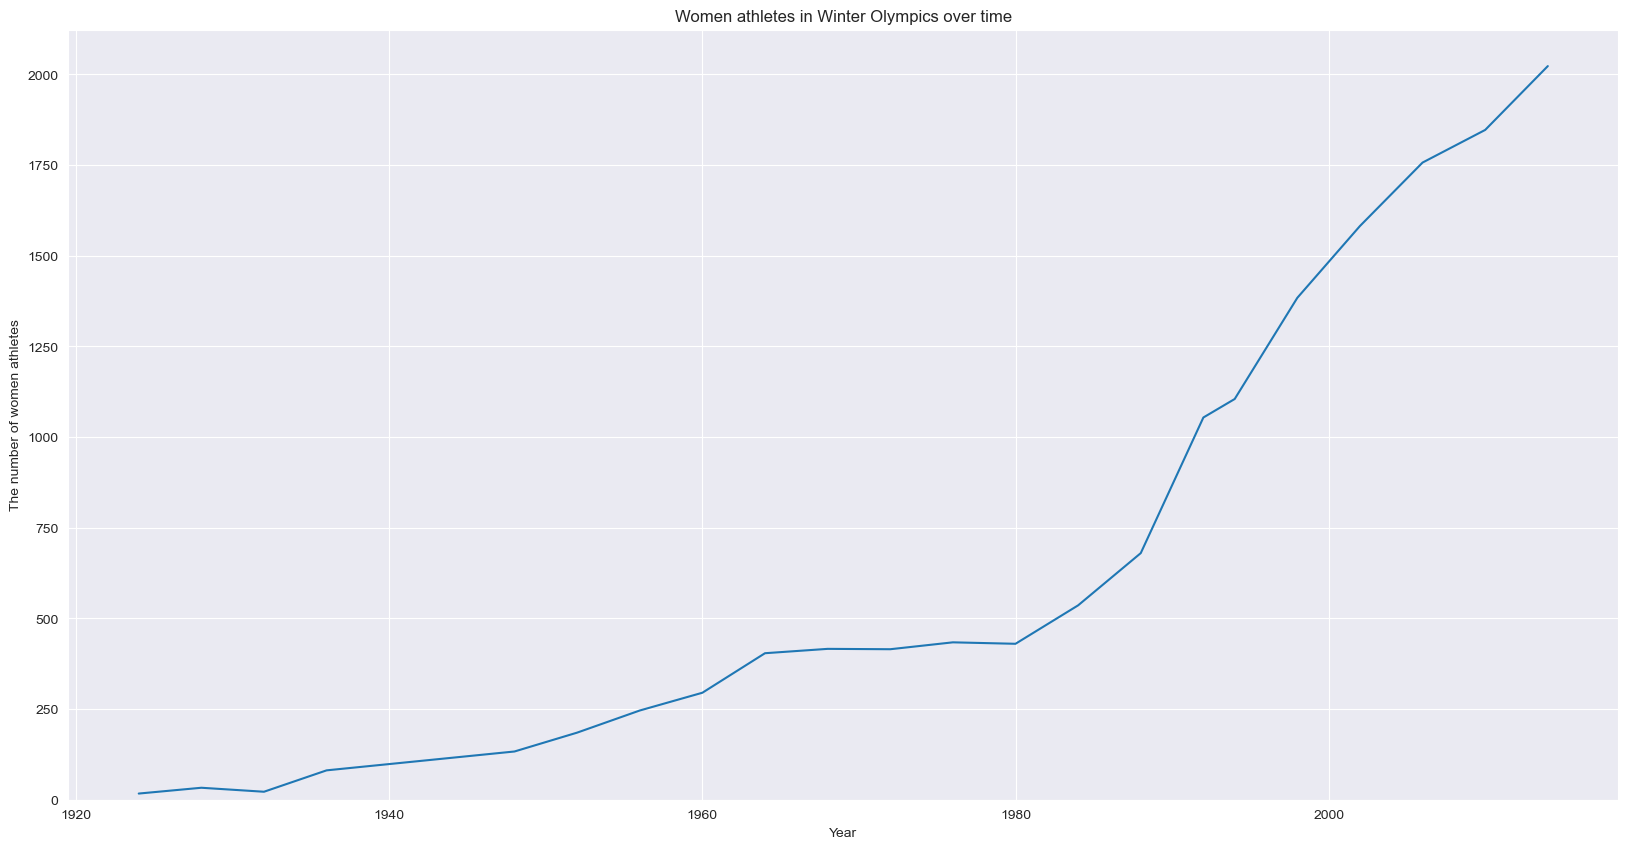

In [237]:
Female_Winter = athletes_full[(athletes_full['Sex']=='F')&(athletes_full['Season']=='Winter')][['Sex','Year']]
Female_Winter_Participation = Female_Winter.groupby('Year')['Sex'].count()


plt.figure(figsize=(20,10))
plt.plot(Female_Winter_Participation.index,Female_Winter_Participation)
plt.title('Women athletes in Winter Olympics over time')
plt.xlabel('Year')
plt.ylabel('The number of women athletes')
plt.ylim(0);

In [301]:
# Gold Medal Athletes with Age over 60

Gold_Over_60 = athletes_full[np.isfinite(athletes_full['Age']>60)&(athletes_full['Medal']=='Gold')]
Gold_Over_60

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


In [302]:
Sports_event = Gold_Over_60['Sport'][Gold_Over_60['Age']>60]
Sports_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

/Users/sunnycao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sports Events for Gold Medal Earned by Athletes over 60')

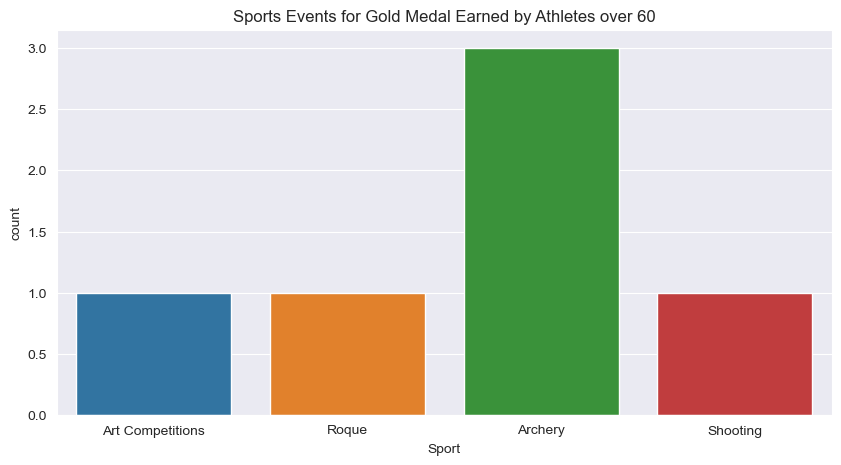

In [303]:
plt.figure(figsize=(10,5))
sns.countplot(Sports_event);
plt.title('Sports Events for Gold Medal Earned by Athletes over 60')

In [271]:
# Gold Medals for each countries

Gold_Medals = athletes_full[athletes_full['Medal']=='Gold']
Gold_Medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [278]:
Countries = Gold_Medals.groupby('Region')['Medal'].count().sort_values(ascending=False).reset_index().head(5)
Countries

,Region,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Gold Medals Earned Top 5 Countries')

<Figure size 1000x500 with 0 Axes>

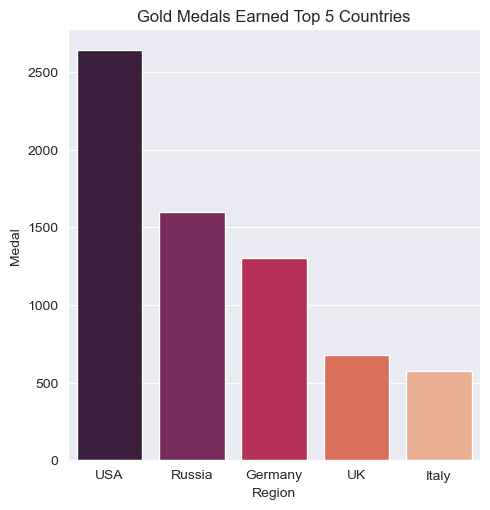

In [281]:
plt.figure(figsize=(10,5))
sns.catplot(x='Region',y='Medal',data=Countries,height=5,kind='bar',palette='rocket')
plt.title('Gold Medals Earned Top 5 Countries')

In [291]:
# Gold Medal Earned in the most recent Olympics per country

Max_Olympics = athletes_full['Year'].max()
Max_Olympics

Teams = athletes_full[(athletes_full['Year']==Max_Olympics)&(athletes_full['Medal']=='Gold')]['Team']
Teams.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

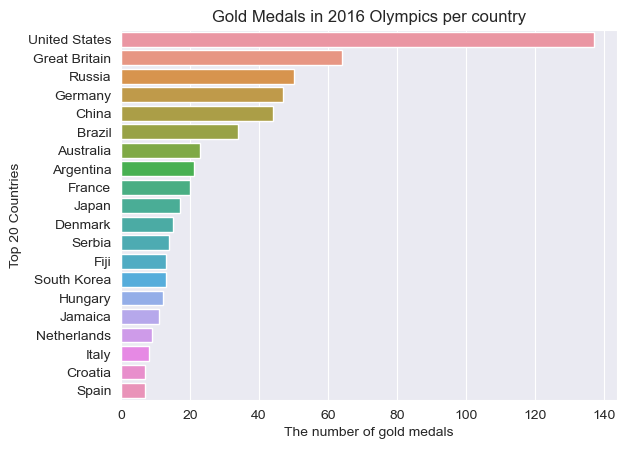

In [299]:

sns.barplot(x=Teams.value_counts().head(20),y=Teams.value_counts().head(20).index)
plt.title('Gold Medals in 2016 Olympics per country')
plt.ylabel('Top 20 Countries')
plt.xlabel('The number of gold medals');

In [304]:
# Height vs. Weight of Olympics Medalists per sex

not_null_medal = athletes_full[(athletes_full['Height'].notnull())&(athletes_full['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs. Weight of Olympics Medalists')

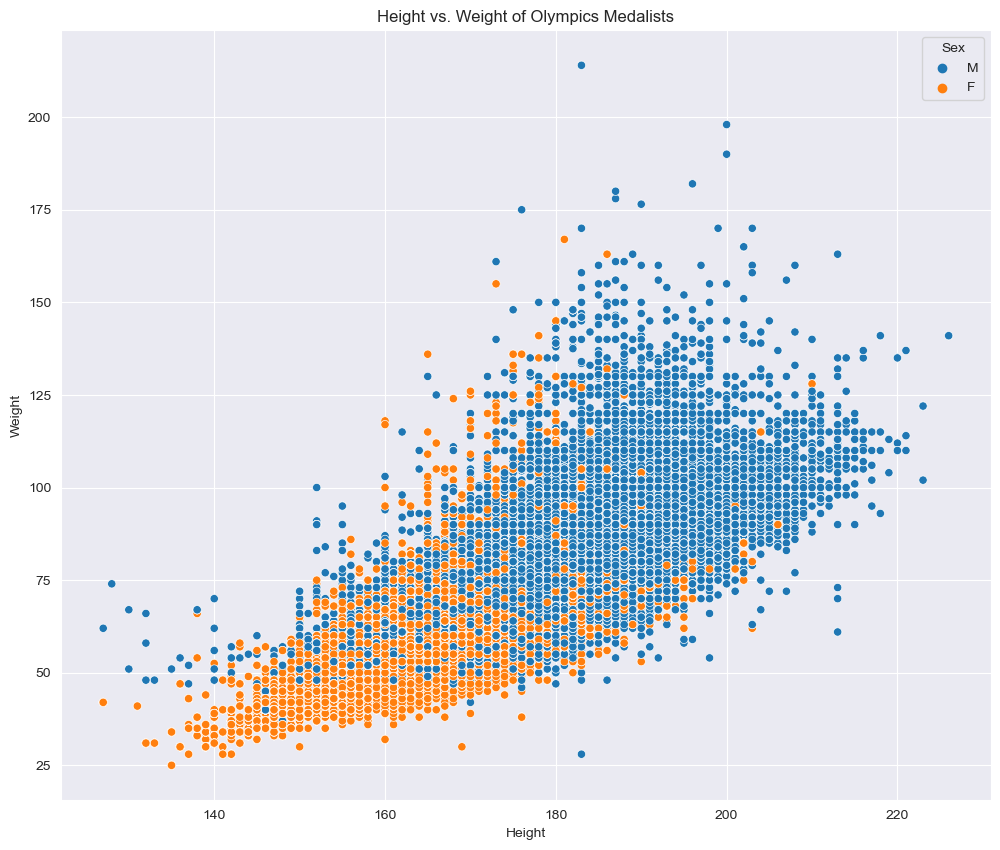

In [313]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Height',y='Weight',data=not_null_medal,hue='Sex')
plt.title('Height vs. Weight of Olympics Medalists')